# Setup

**Imports**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

**Utility functions**

In [8]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.margins(x=0)
    return fig, ax

# Question 2

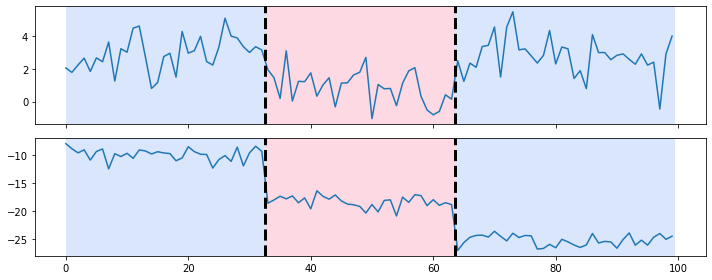

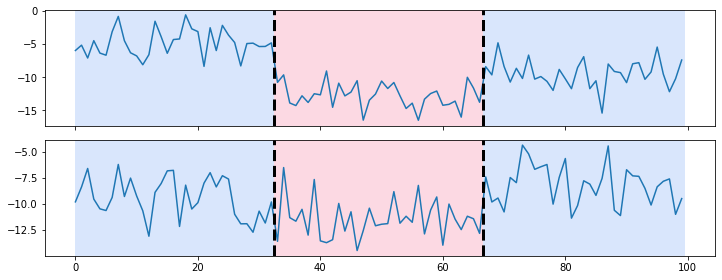

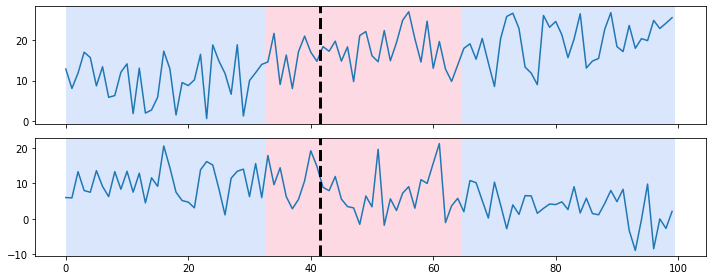

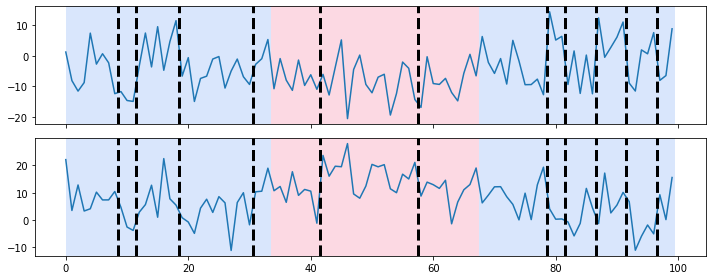

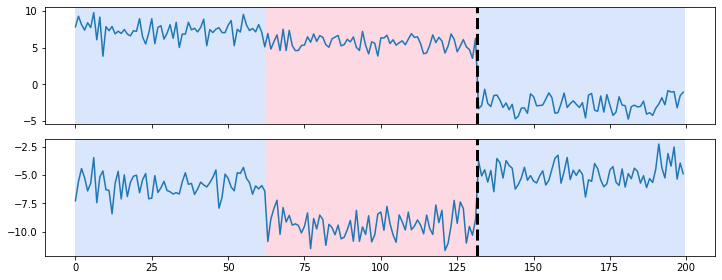

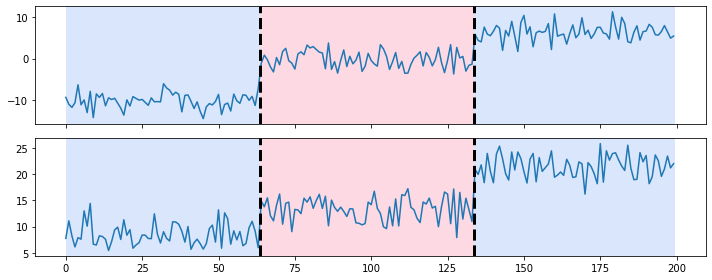

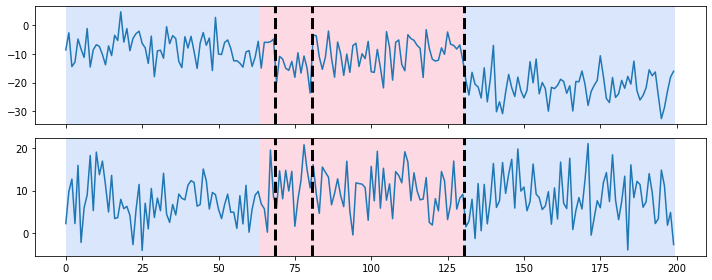

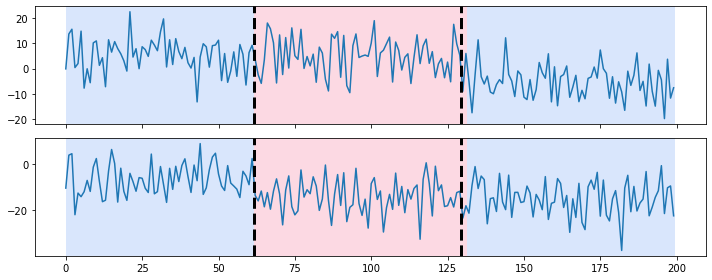

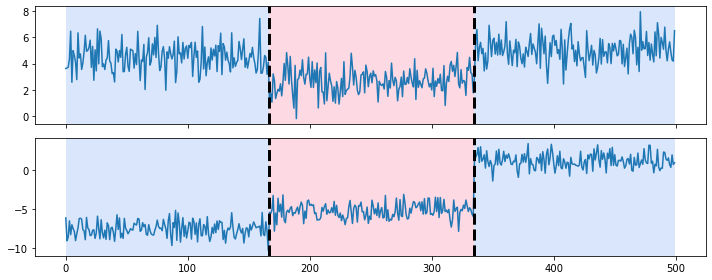

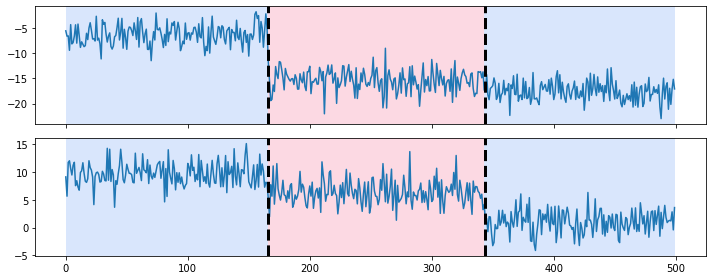

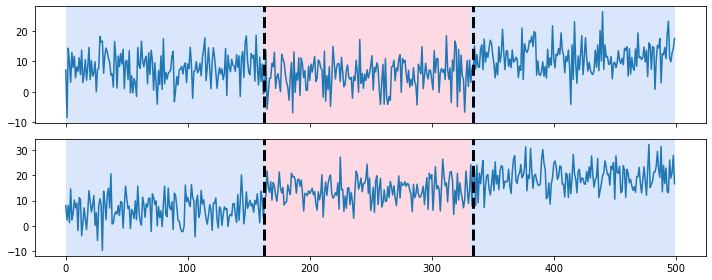

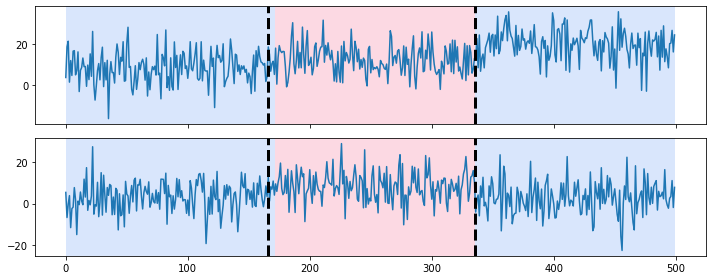

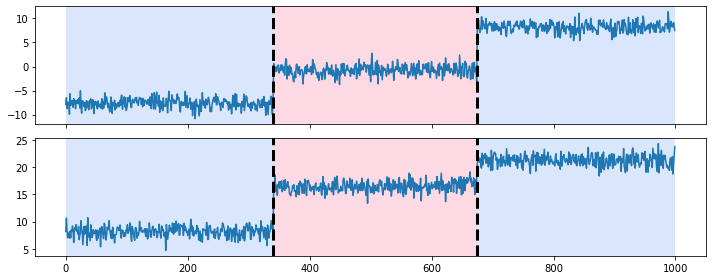

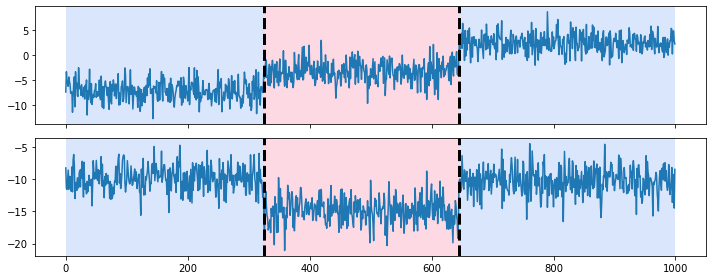

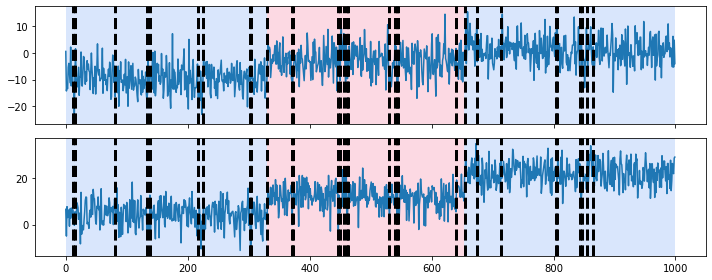

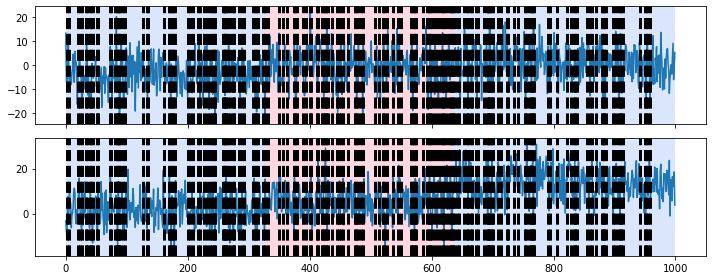

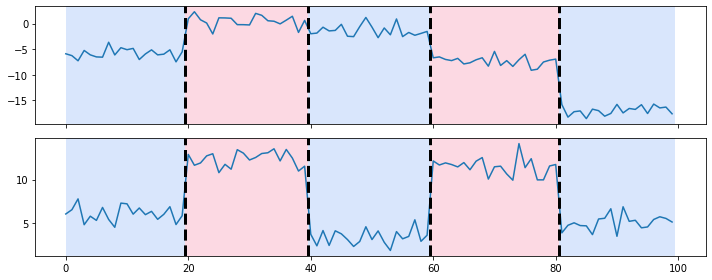

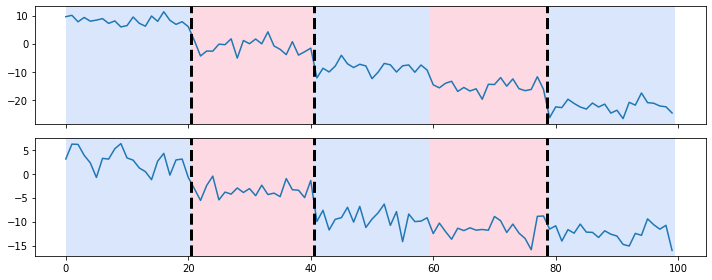

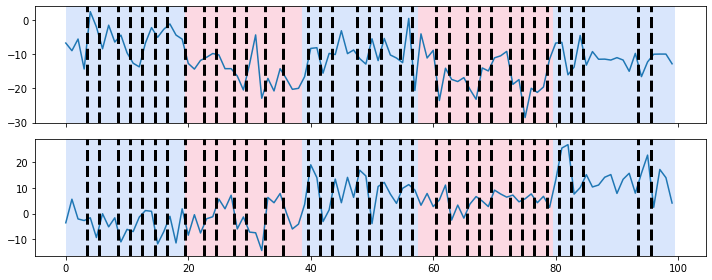

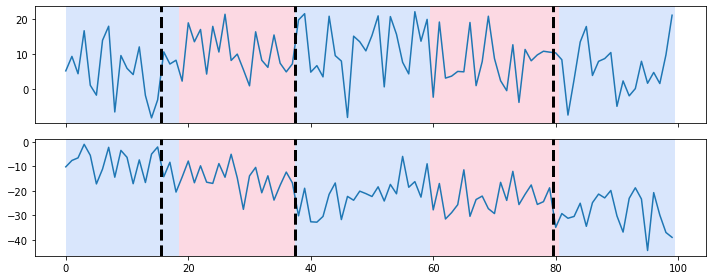

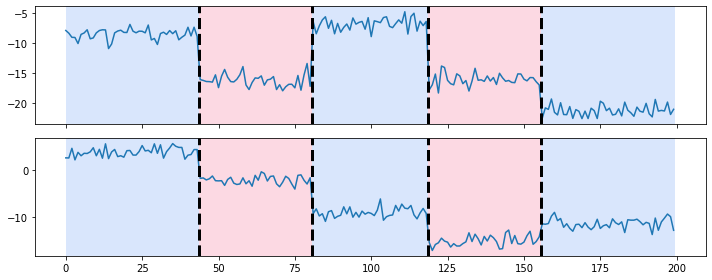

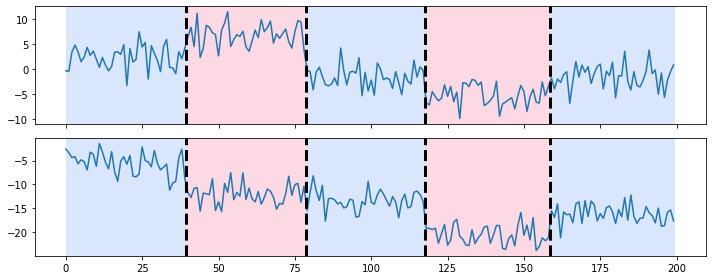

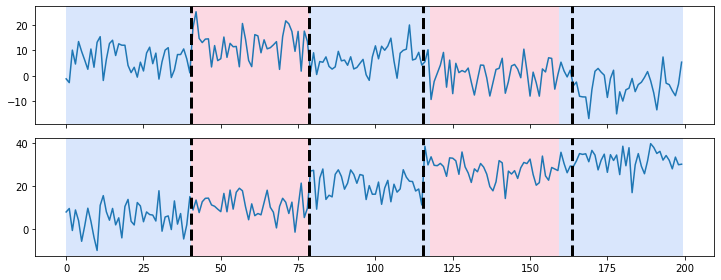

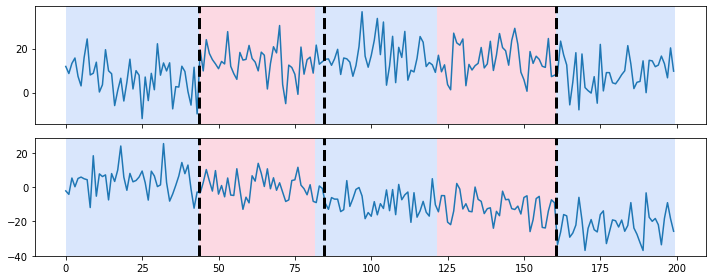

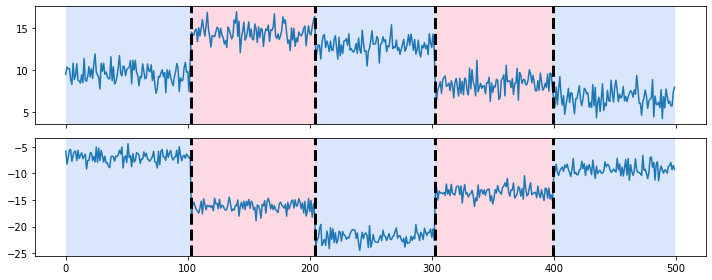

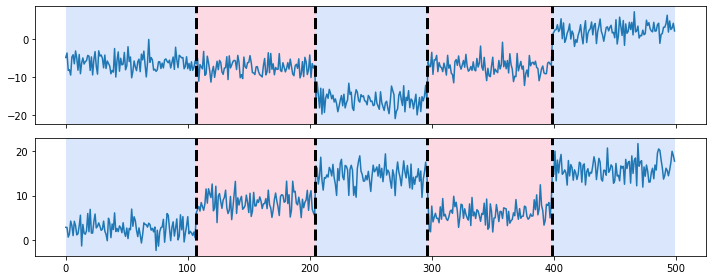

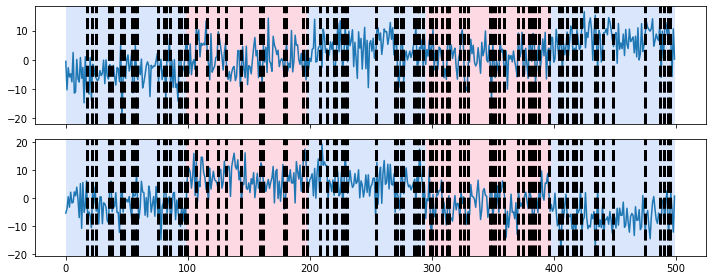

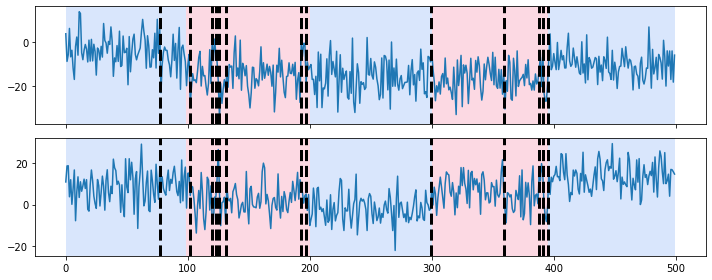

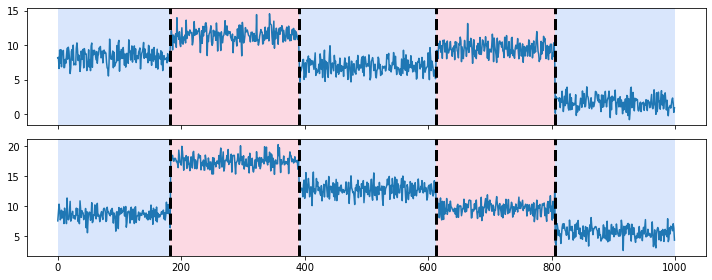

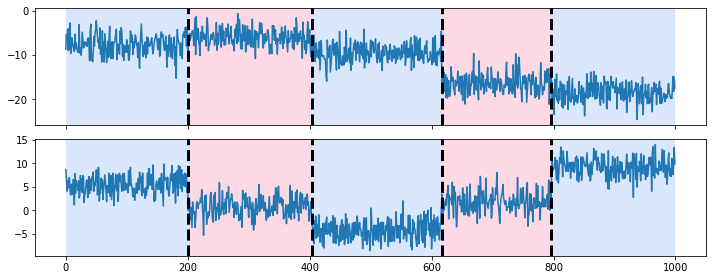

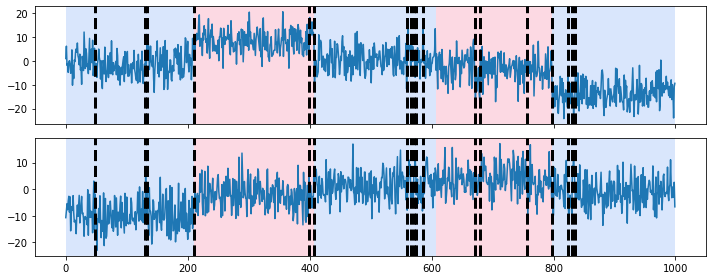

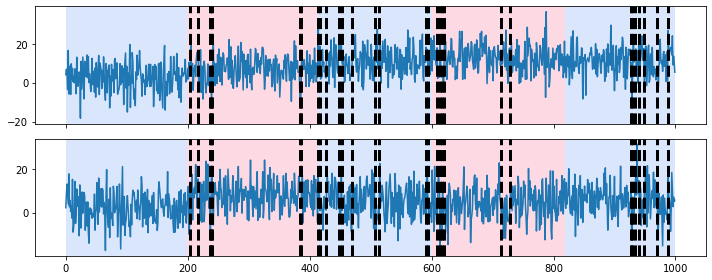

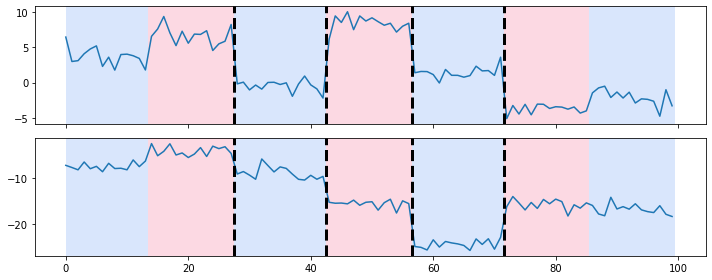

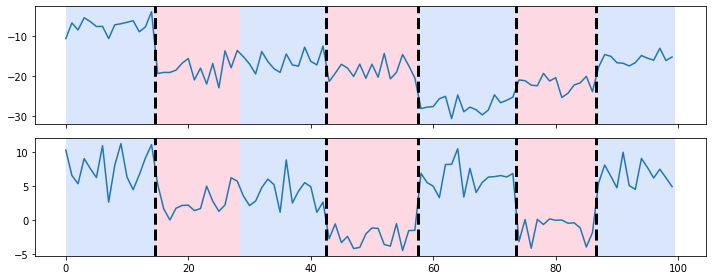

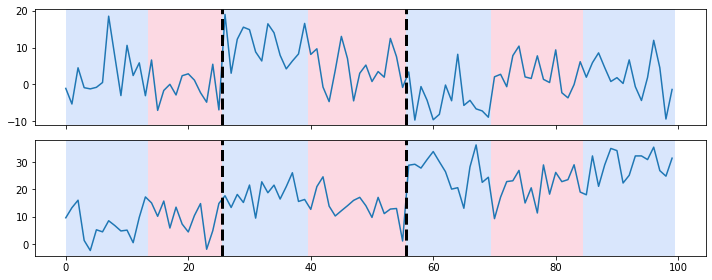

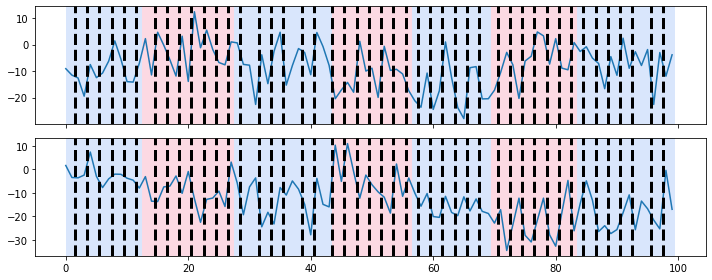

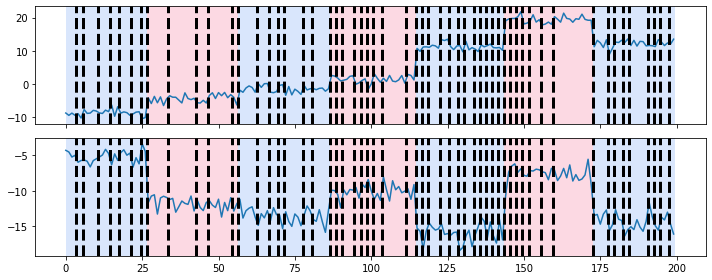

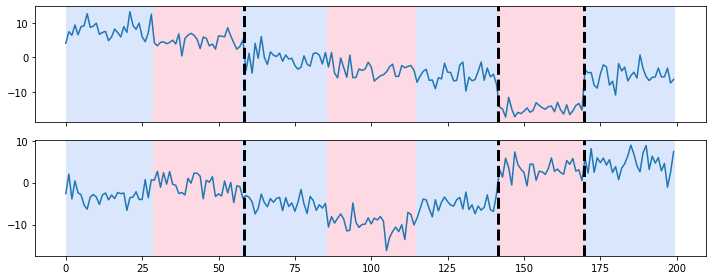

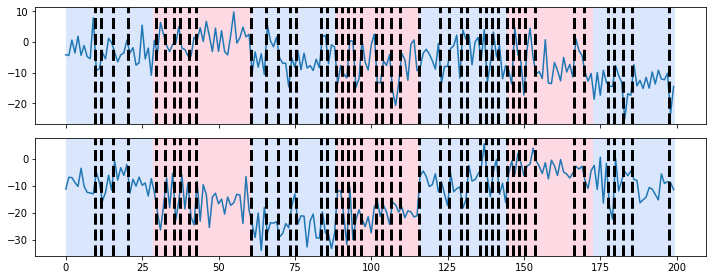

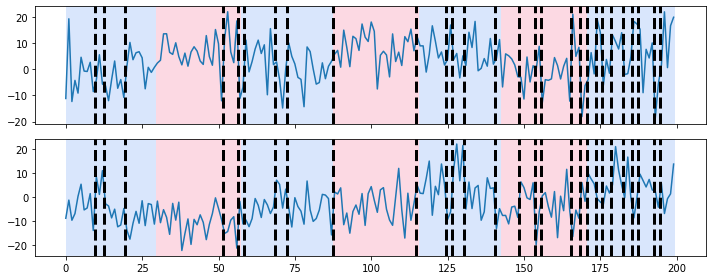

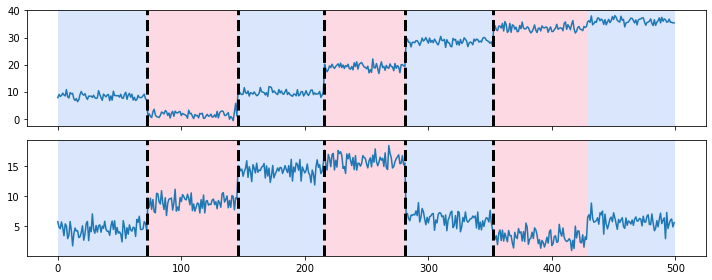

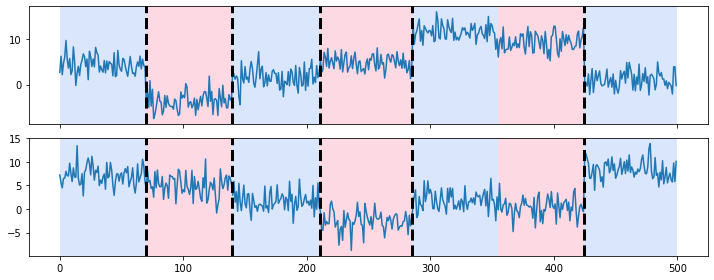

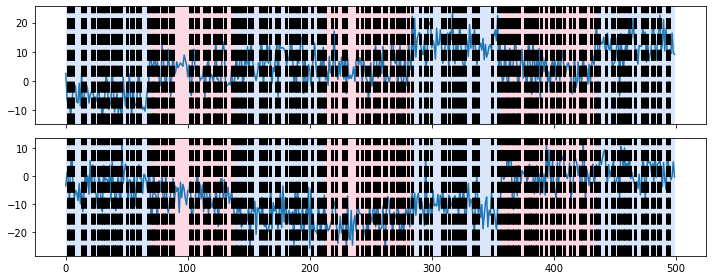

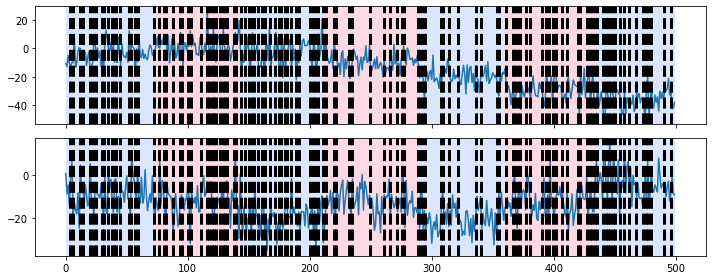

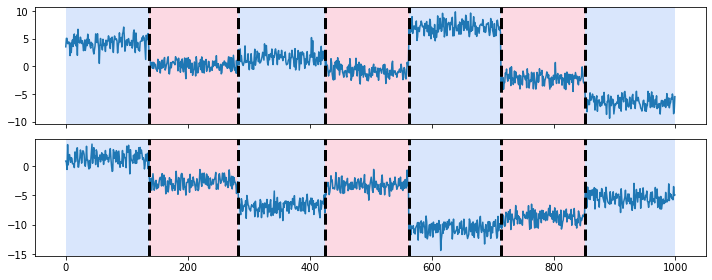

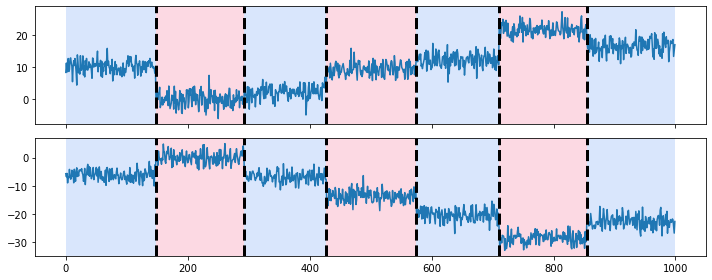

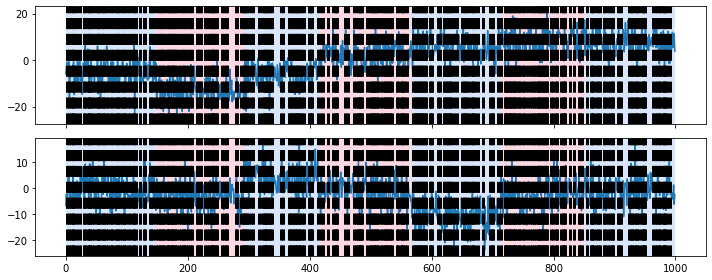

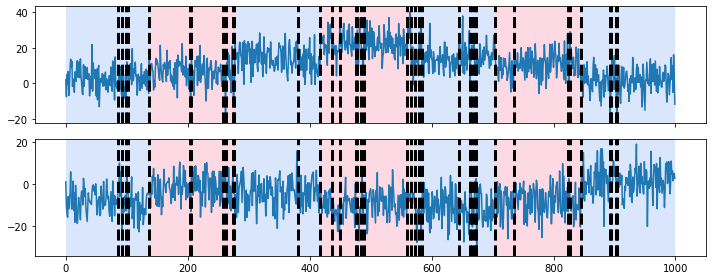

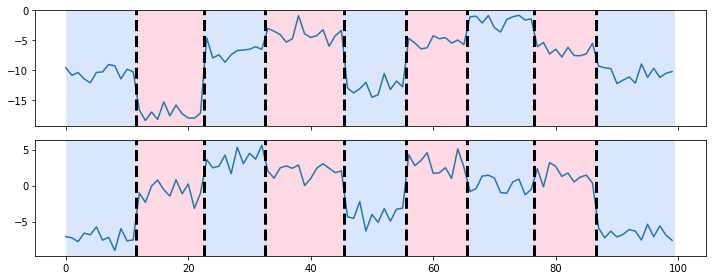

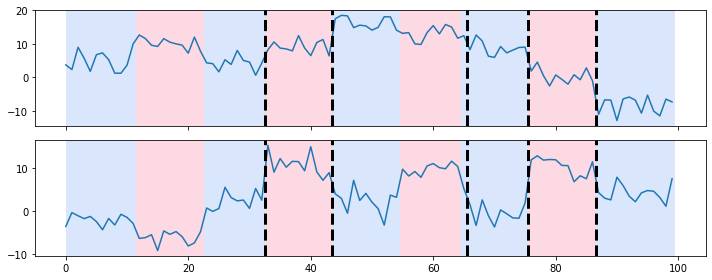

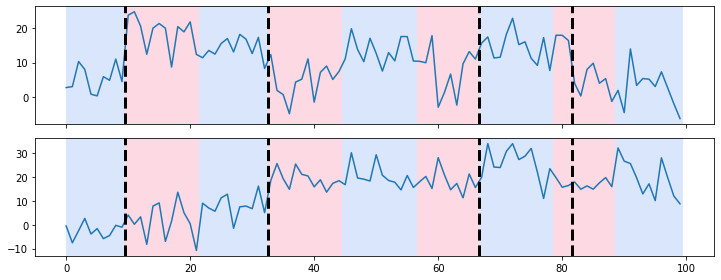

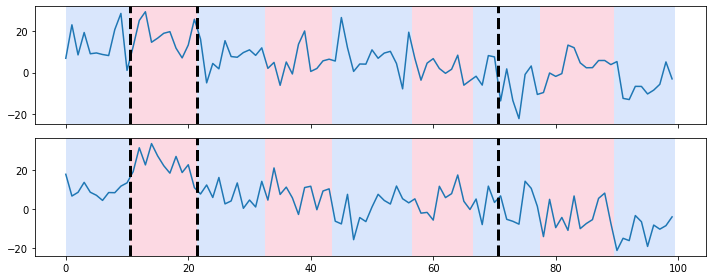

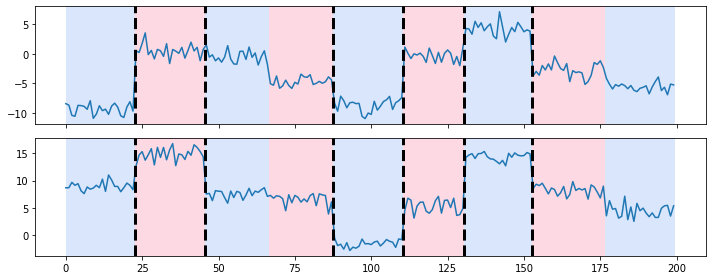

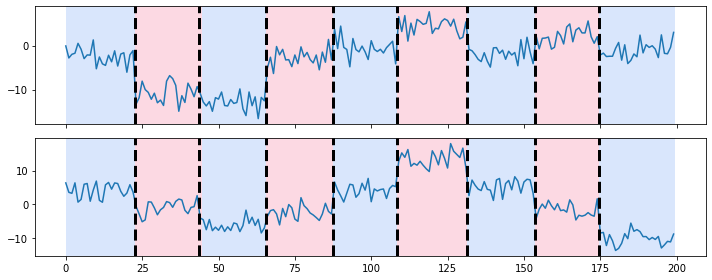

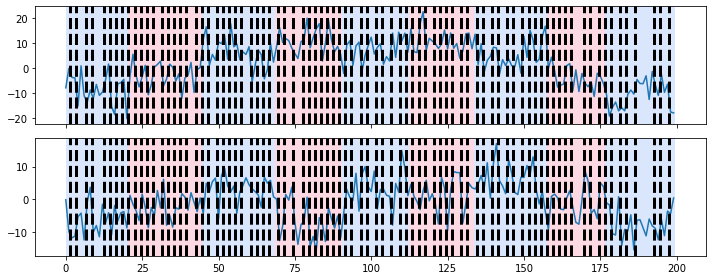

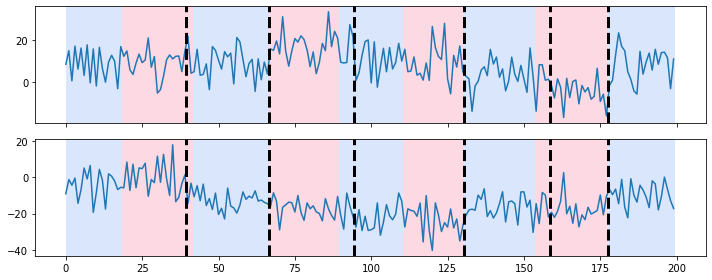

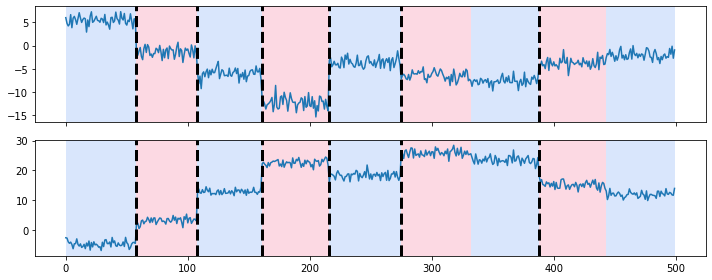

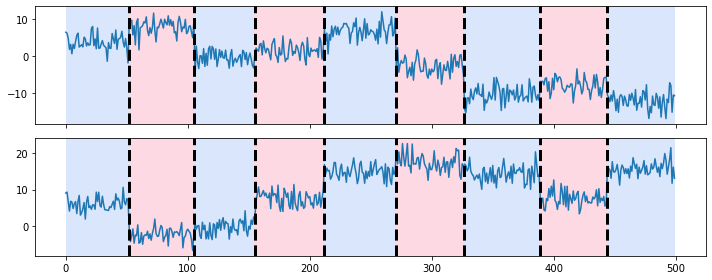

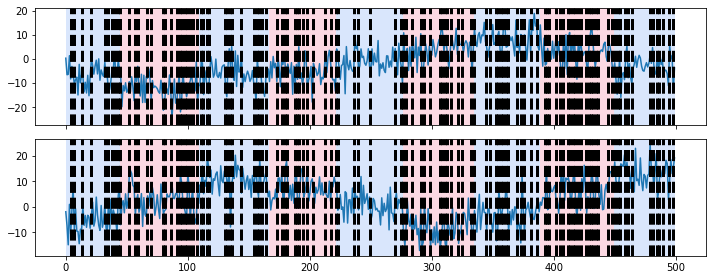

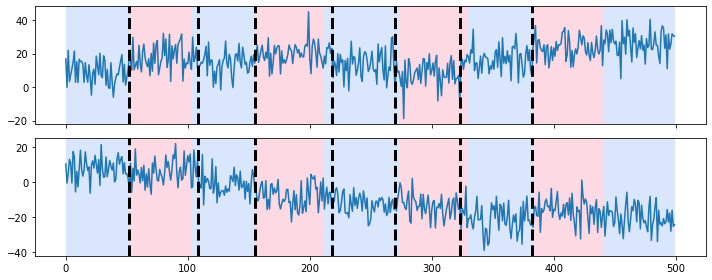

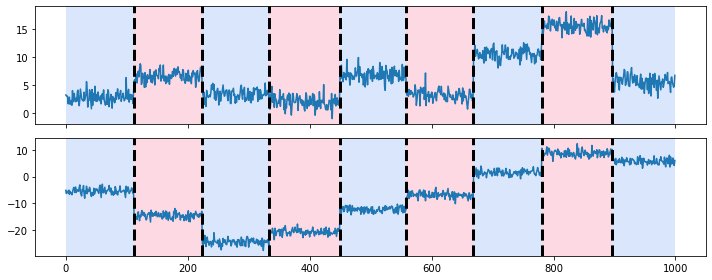

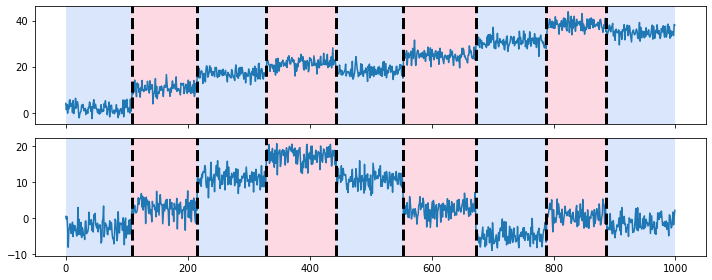

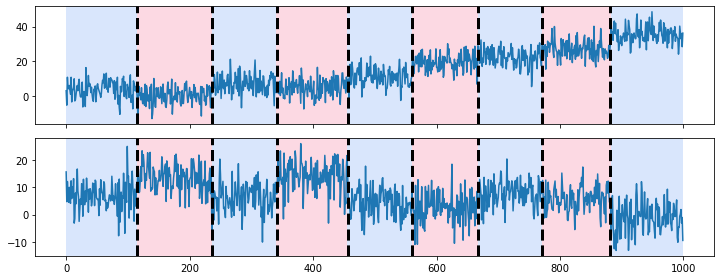

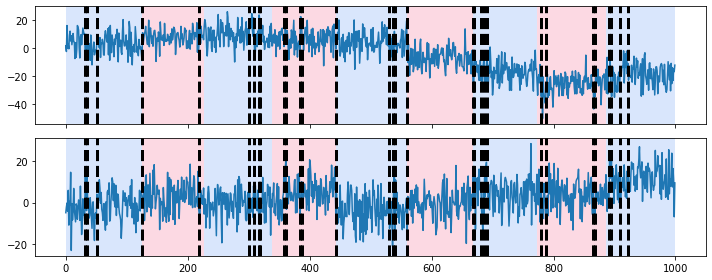

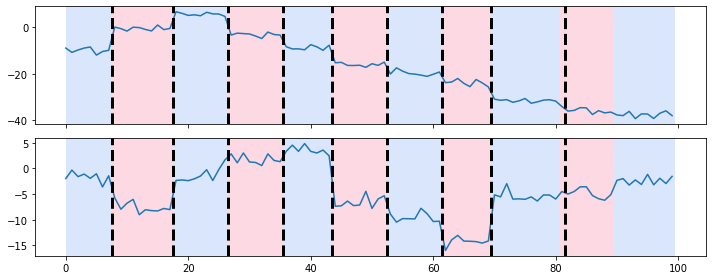

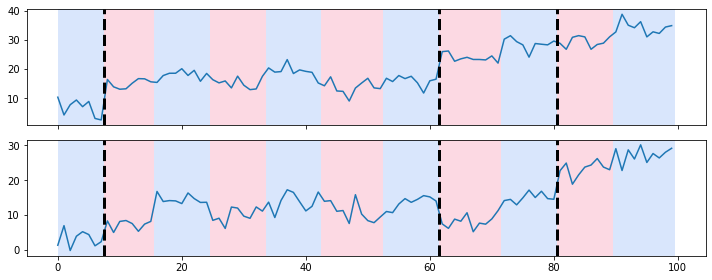

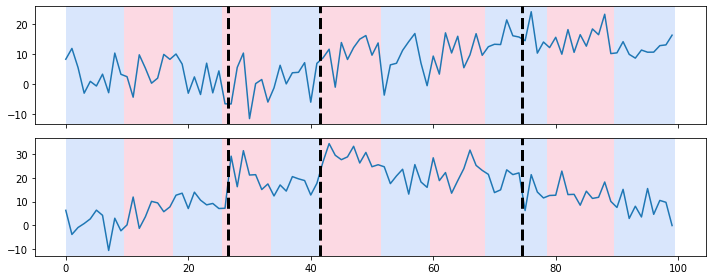

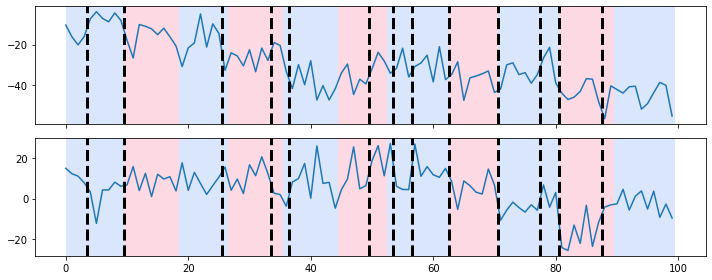

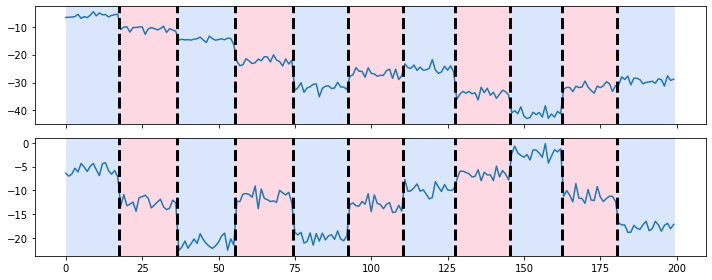

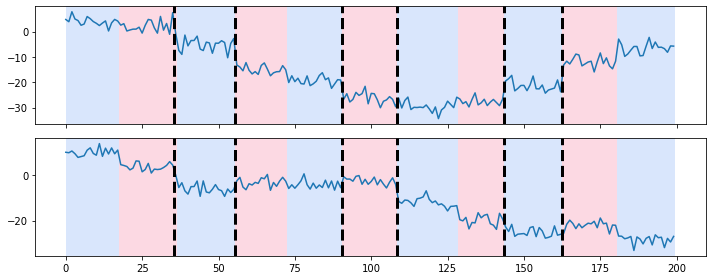

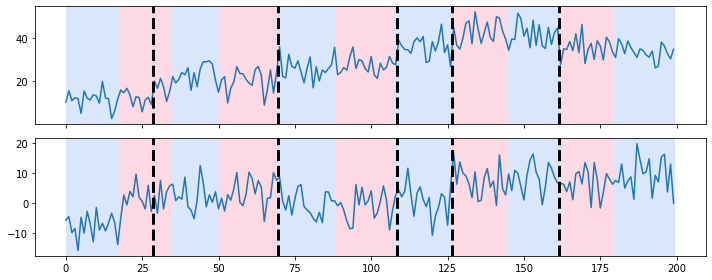

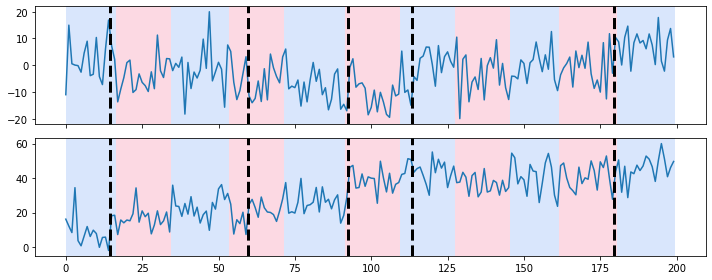

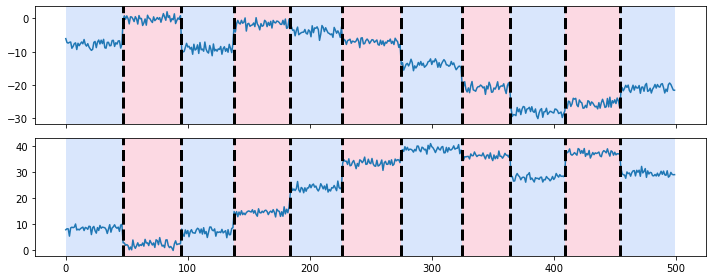

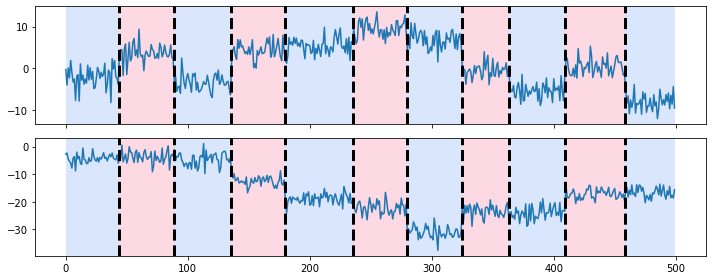

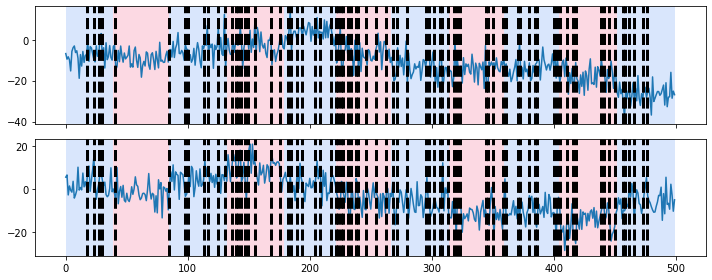

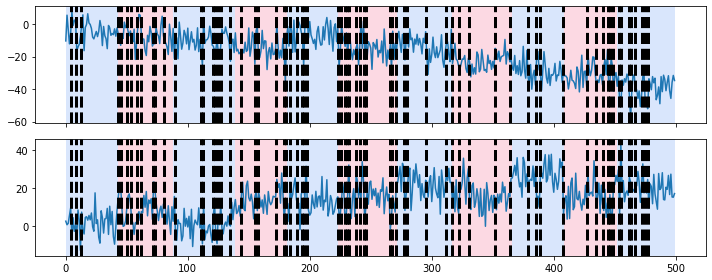

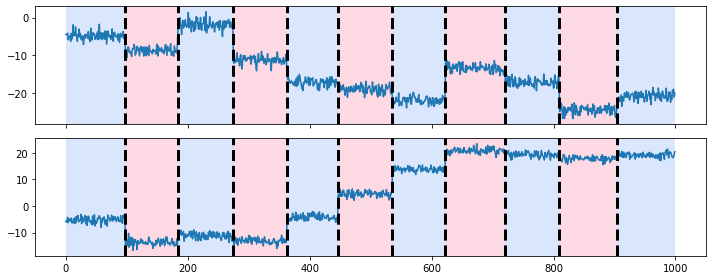

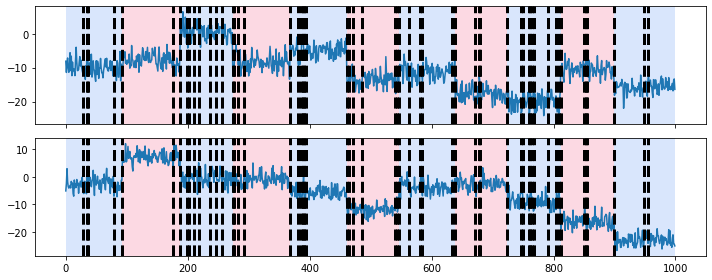

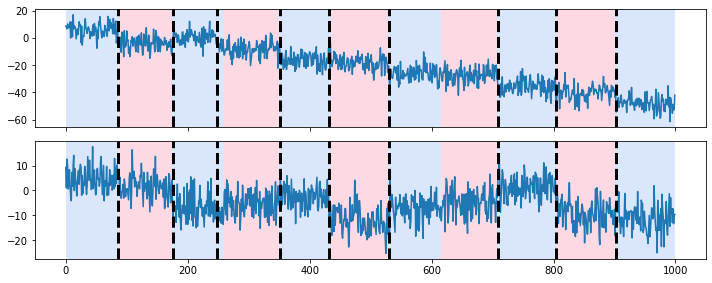

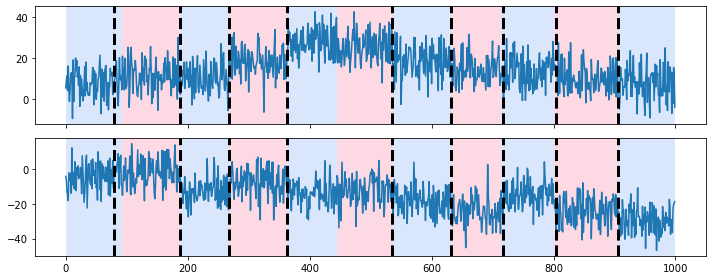

In [63]:
# to detect mean shift, use the faster dynamic programming algorithm in rpt.KernelCPD(kernel="linear")

# generate signal
for bk in [2, 4, 6, 8, 10]:
    for T in [100, 200, 500, 1000]:
        for sigma in [1, 2, 5, 7]:
            
            n_samples = T
            n_bkps = bk
            n_dims = 2
            sigma_noise = sigma
            signal, bkps = rpt.pw_constant(
                n_samples=n_samples, n_features=n_dims, n_bkps=n_bkps, noise_std=0
            )
            signal_with_noise = signal + np.random.normal(
                scale=sigma_noise, size=signal.shape
            )



            algo = rpt.KernelCPD(kernel="linear").fit(signal_with_noise)

            #result = algo.predict(n_bkps=10)  # detects 10 change-points
            
            # Mallow's Cp
            signal_10percent = np.array_split(signal,10)[0]
            sigma_emp = ((np.array_split(signal,10)[0] - mean)**2).sum(1).mean()
            penality = 2*sigma_emp
            result = algo.predict(pen=penality)  # minimizes the linearly penalized sum of costs (with beta=10)

            # display
            rpt.display(signal_with_noise, bkps, result)
            plt.show()

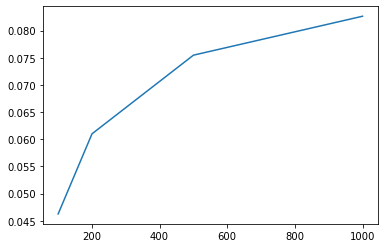

In [92]:
from ruptures.metrics import hamming

hammingList = []
for T in [100, 200, 500, 1000]:    
            
    n_samples = T
    n_bkps = bk
    n_dims = 2
    sigma_noise = 2
    signal, bkps = rpt.pw_constant(
        n_samples=n_samples, n_features=n_dims, n_bkps=n_bkps, noise_std=0
    )
    signal_with_noise = signal + np.random.normal(
        scale=sigma_noise, size=signal.shape
    )



    algo = rpt.KernelCPD(kernel="linear").fit(signal_with_noise)
    algo.predict(n_bkps=10)  # detects 10 change-points
    
    
    result = algo.predict(pen=10)  # minimizes the linearly penalized sum of costs (with beta=10)

    hammingList.append(hamming(bkps,result)) 

plt.plot([100, 200, 500, 1000],hammingList)
plt.show()

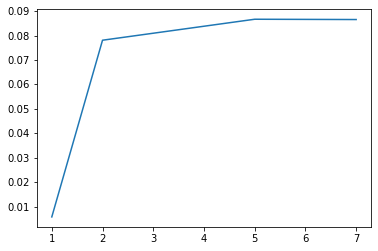

In [93]:
hammingList = []

for sigma in [1, 2, 5, 7]:  
            
    n_samples = 500
    n_bkps = bk
    n_dims = 2
    sigma_noise = sigma
    signal, bkps = rpt.pw_constant(
        n_samples=n_samples, n_features=n_dims, n_bkps=n_bkps, noise_std=0
    )
    signal_with_noise = signal + np.random.normal(
        scale=sigma_noise, size=signal.shape
    )



    algo = rpt.KernelCPD(kernel="linear").fit(signal_with_noise)
    algo.predict(n_bkps=10)  # detects 10 change-points
    result = algo.predict(pen=10)  # minimizes the linearly penalized sum of costs (with beta=10)

    hammingList.append(hamming(bkps,result))  
    
plt.plot([1, 2, 5, 7],hammingList)
plt.show()

# Question 3

# Question 4

# Question 5

# Question 6

# Question 7

In [ ]:
y = np.random.normal(size=600)  # dummy signal
x = np.arange(y.shape[0])
class_array = np.random.binomial(n=2, p=0.5, size=y.shape[0])  # dummy classes (0, 1, 2)


colors = ["b", "m", "r"]  # three colours=three classes
color_array = np.take(colors, class_array)
fig, ax = fig_ax()
ax.plot(x, y, alpha=0.5)
ax.scatter(x, y, c=color_array)

# do not forget to explain the colours in the reportc

# Question 8